In [1]:
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')
import multi_funcs as mf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
import itertools


In [2]:
results = mf.gs_f_simulate_nx_max_lengths(10000, 8000, 8)
df = mf.make_df_max_match_length_MM(8000, 8, results, save=True)

In [4]:
def prep(k, n):
    df = pd.read_csv(f'data/simulations/max_matching_lengths/n_{n}_k_{k}_max_length_cycles.csv')
    df = df.sort_values(by=['cycle_lengths']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 8
    df['binned'] = pd.cut(df['cycle_lengths'], bins = nbins, include_lowest=True)
    df['binned'] = df["binned"].apply(lambda x: x.left)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['1-CDF'] = 1 - x[0].cumsum()
    x['log'] = np.log(x['1-CDF'])
    return x.iloc[:-1,:]

c:\ProgramData\anaconda3\envs\CatchALL_20231003\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


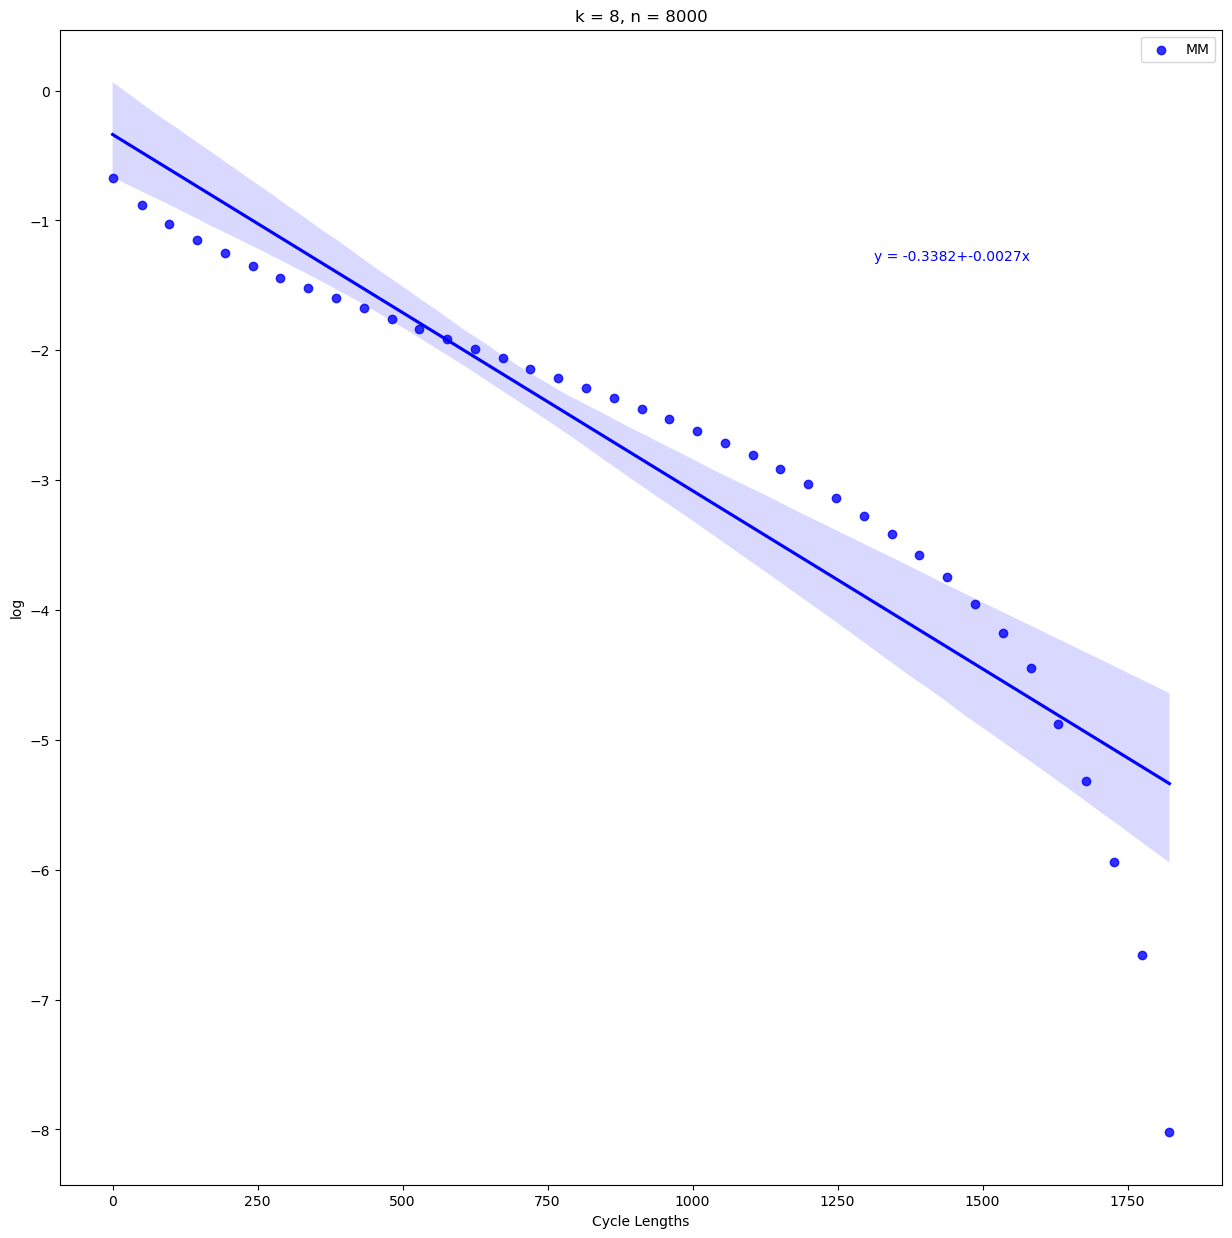

In [5]:
k = 8
n = 8000

fig, ax = plt.subplots(figsize=(15, 15))

df = prep(k, n)
sns.regplot(x='binned', y='log', data=df, ax=ax, color = 'blue', label='MM')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax.text(0.7, 0.8, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform = ax.transAxes, color = 'blue')
ax.set_title(f'k = {k}, n = {n}')
ax.set_xlabel('Cycle Lengths')
ax.legend()
    
plt.savefig(f'outputs/regression_plots/k_{k}.png', dpi= 300)

### Histogram of Cycle Lengths

In [6]:
df = pd.read_csv(f'data/simulations/max_matching_lengths/n_{n}_k_{k}_max_length_cycles.csv')

In [7]:
df

,Unnamed: 0,n,k,cycle_lengths,as_percent_of_matches
0,0,8000,8,1278,0.167695
1,1,8000,8,190,0.024931
2,2,8000,8,133,0.017452
3,3,8000,8,15,0.001968
4,4,8000,8,7,0.000919
...,...,...,...,...,...
70066,70066,8000,8,75,0.009863
70067,70067,8000,8,14,0.001841
70068,70068,8000,8,20,0.002630
70069,70069,8000,8,29,0.003814


In [8]:
df_grouped = df.groupby('cycle_lengths', as_index=False).count().sort_values(by='cycle_lengths', ascending=False)

In [9]:
df_grouped['number_of_students'] = df_grouped.cycle_lengths*df_grouped.n

In [10]:
df_grouped

,cycle_lengths,Unnamed: 0,n,k,as_percent_of_matches,number_of_students
1872,2045,1,1,1,1,2045
1871,1980,1,1,1,1,1980
1870,1959,1,1,1,1,1959
1869,1952,1,1,1,1,1952
1868,1950,1,1,1,1,1950
...,...,...,...,...,...,...
4,6,1709,1709,1709,1709,10254
3,5,1978,1978,1978,1978,9890
2,4,2466,2466,2466,2466,9864
1,3,3339,3339,3339,3339,10017


Text(0.5, 1.0, 'k = 8, n = 8000, Distribution of Students Across Cycle Lengths (10,000 Simulations)')

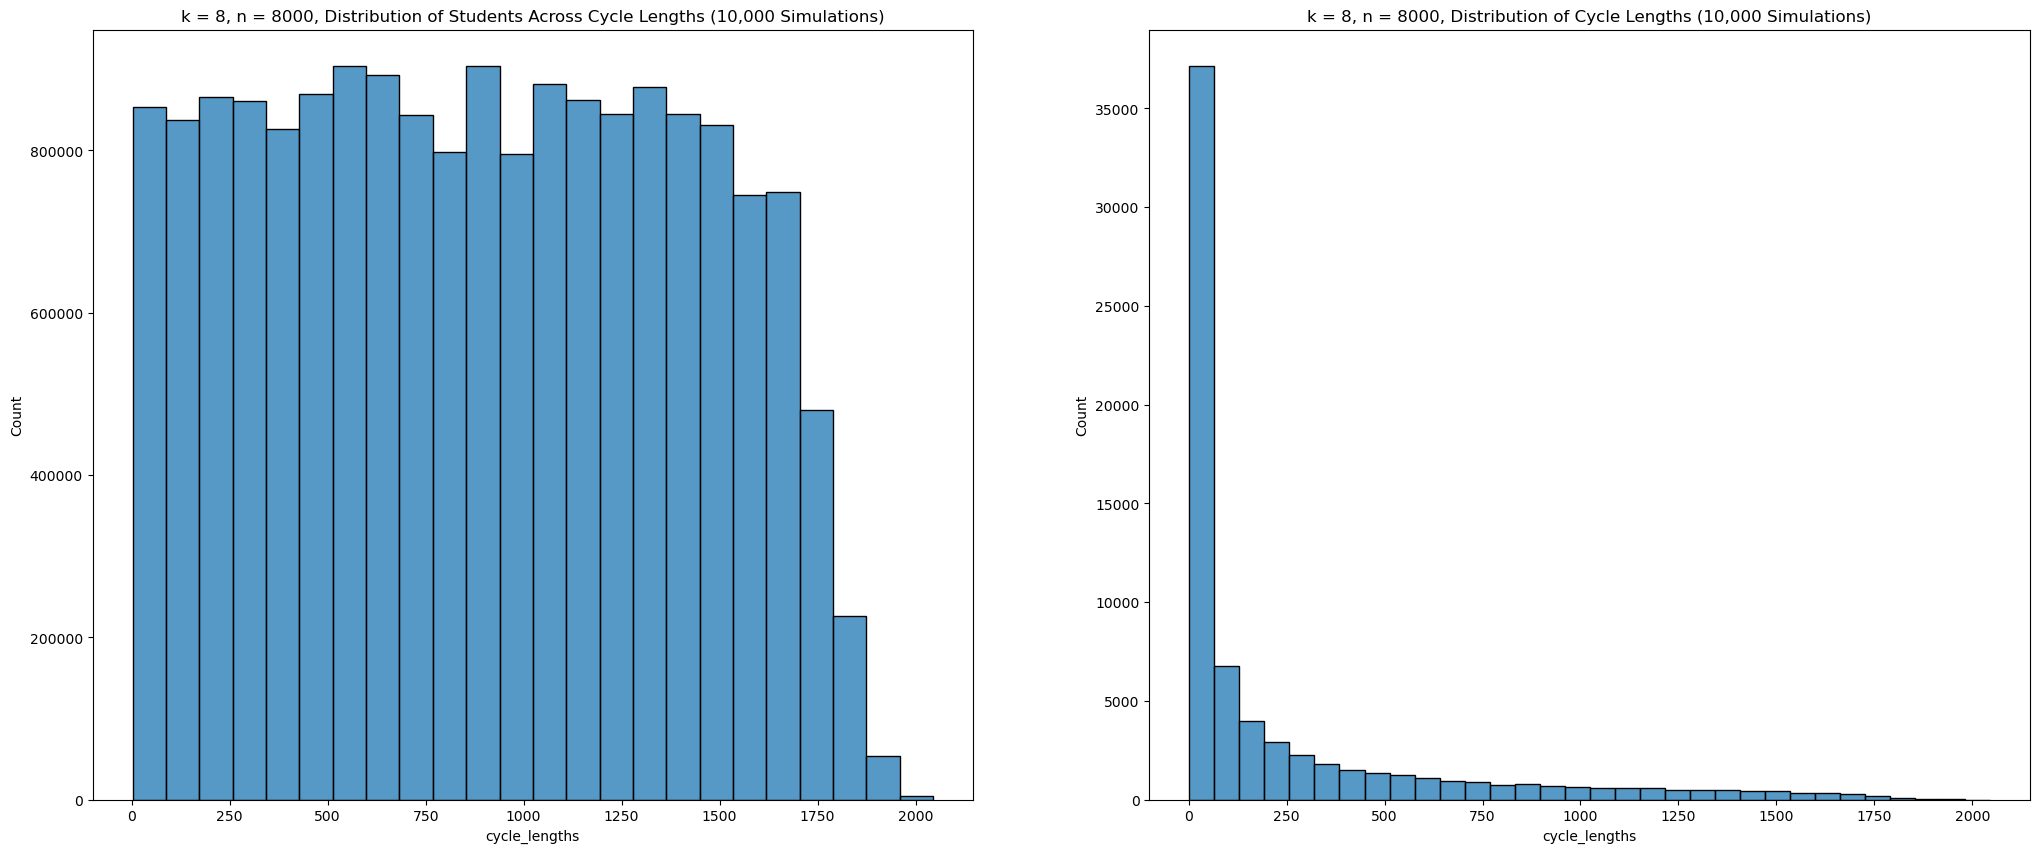

In [13]:
fig, ax = plt.subplots(1,2, figsize=(25, 10))

sns.histplot(df['cycle_lengths'], bins = 4*k, ax=ax[1])
ax[1].set_title(f'k = {k}, n = {n}, Distribution of Cycle Lengths (10,000 Simulations)')

sns.histplot(df_grouped.reset_index(drop=True), x= 'cycle_lengths', weights='number_of_students', bins = 3*k, ax=ax[0])
ax[0].set_title(f'k = {k}, n = {n}, Distribution of Students Across Cycle Lengths (10,000 Simulations)')

